/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Activation: relu, Optimizer: adam, MSE: 2893.5203
Activation: relu, Optimizer: sgd, MSE: 3819.1797
Activation: relu, Optimizer: rmsprop, MSE: 2853.9080
Activation: relu, Optimizer: Adagrad, MSE: 23733.8867


Activation: tanh, Optimizer: adam, MSE: 15000.9395


Activation: tanh, Optimizer: sgd, MSE: 2785.8708
Activation: tanh, Optimizer: rmsprop, MSE: 15410.3779
Activation: tanh, Optimizer: Adagrad, MSE: 25986.5625
Activation: sigmoid, Optimizer: adam, MSE: 19413.7129
Activation: sigmoid, Optimizer: sgd, MSE: 3006.2283
Activation: sigmoid, Optimizer: rmsprop, MSE: 17271.3184
Activation: sigmoid, Optimizer: Adagrad, MSE: 25491.8477


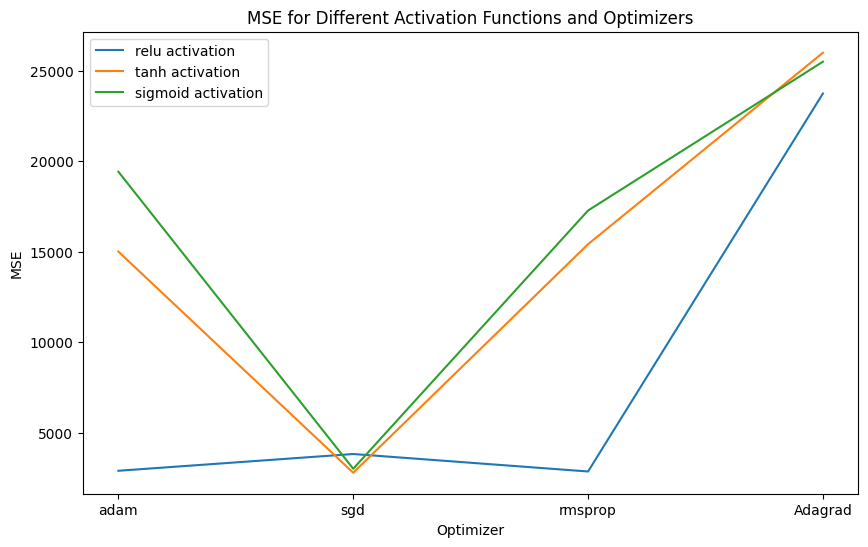

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

data = load_diabetes()
X = data.data
y = data.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def create_model(activation, optimizer):
    model = Sequential()
    model.add(Dense(64, input_shape=(X_train.shape[1],), activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(1))

    optimizer = tf.keras.optimizers.get(optimizer)
    if isinstance(optimizer, SGD):
        optimizer.learning_rate = 0.0001

    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mse'])
    return model


activation_functions = ['relu', 'tanh', 'sigmoid']
optimizers = ['adam', 'sgd', 'rmsprop', 'Adagrad']
results = {}

for activation in activation_functions:
    for optimizer in optimizers:
        model = create_model(activation=activation, optimizer=optimizer)
        model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

        loss, mse = model.evaluate(X_test, y_test, verbose=0)
        results[(activation, optimizer)] = mse
        print(f"Activation: {activation}, Optimizer: {optimizer}, MSE: {mse:.4f}")


plt.figure(figsize=(10, 6))
for activation in activation_functions:
    x_values = []
    y_values = []
    for optimizer in optimizers:
        x_values.append(optimizer)
        y_values.append(results[(activation, optimizer)])
    plt.plot(x_values, y_values, label=f'{activation} activation')


plt.xlabel('Optimizer')
plt.ylabel('Performance Metric')
plt.title('Performance by Activation Function and Optimizer')
plt.legend()
plt.show()

